# Analysis of Credit Score Classification Part

In [92]:
import pandas as pd
import numpy as np
import os 
from pandas_profiling import ProfileReport

In [93]:
import warnings
# suppressing a warning
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [94]:
from scipy import stats

In [95]:
# train data
df_train= pd.read_csv("train.csv")

In [96]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


In [97]:
# test data
df_test = pd.read_csv("test.csv")
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


### 1) Recognizing and Understanding Data

df_train.shape , df_test.shape

In [98]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [99]:
df_test.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

 * in case of testing data has not contain "Credit_Score"

In [100]:
display(
    df_train.info(),
    print("*"*100),
    df_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

None

None

In [101]:
display(
    df_train.describe().T,
    print(),
    df_test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


None

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


* Now Descibe the non-numeric data

In [102]:
display(
    df_train.describe(exclude = np.number).T,
    print(""),
    df_test.describe(exclude = np.number).T
)

,count,unique,top,freq
ID,100000,100000,0x1391d,1
Customer_ID,100000,12500,CUS_0x1b41,8
Month,100000,8,March,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,20867.67,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


None

,count,unique,top,freq
ID,50000,50000,0x147ad,1
Customer_ID,50000,12500,CUS_0x1b41,4
Month,50000,4,November,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,22434.16,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


### Checking the missing value

In [103]:
df_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [104]:
df_test.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [105]:
df_train.columns[:-1] != df_test.columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [106]:
(df_train.columns[:-1] != df_test.columns).sum()

0

In [107]:
df = pd.concat([df_train,df_test],ignore_index=True)
df.shape

(150000, 28)

In [108]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [109]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

#### Note:-
* In case test set not contain the Credit_Score so Missing value -- "5000"

### 2) Examining the Data

In [110]:
# Return DataFrame’s columns based on the column dtypes --->"Object" type
df.select_dtypes("O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [111]:
df.select_dtypes("O")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,18.31,_,3571.7,NaN,Yes,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,2_,"Auto Loan, and Student Loan",NaN,11.5,Good,502.38,31 Years and 11 Months,NM,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",5,13.5,Good,502.38,32 Years and 0 Months,No,__10000__,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,2_,"Auto Loan, and Student Loan",6_,11.5,Good,502.38,32 Years and 1 Months,No,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


####  * Detect the strange value apart from the NaN Values

In [112]:
# store the same Object datatype into single element
df.select_dtypes(include = "O").columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [113]:
object_col = df.select_dtypes(include = "O").columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [114]:
# no. of different "Name" include the "NaN"
df_train["Name"].value_counts(dropna= False )  

NaN            9985
Stevex           44
Langep           44
Vaughanl         39
Jessicad         39
               ... 
Matt Dailyw       4
Lucye             4
Habboushg         4
Vinocurw          4
Timothyl          3
Name: Name, Length: 10140, dtype: int64

In [115]:
for col in object_col:
    print("Column Name : {}".format(col))
    print("*"*30)
    print(df_train[col].value_counts(dropna = False))
    print("--"*30,"\n")
print("END")

Column Name : ID
******************************
0x1391d    1
0x1976a    1
0xce40     1
0x3a56     1
0x25521    1
          ..
0x1e10e    1
0xf20e     1
0x1d1f7    1
0xa9b0     1
0x14752    1
Name: ID, Length: 100000, dtype: int64
------------------------------------------------------------ 

Column Name : Customer_ID
******************************
CUS_0x1b41    8
CUS_0x1935    8
CUS_0x8807    8
CUS_0xa8cb    8
CUS_0x2ce8    8
             ..
CUS_0x8c13    8
CUS_0x54d4    8
CUS_0xb873    8
CUS_0x7b31    8
CUS_0x67a4    8
Name: Customer_ID, Length: 12500, dtype: int64
------------------------------------------------------------ 

Column Name : Month
******************************
March       12500
June        12500
January     12500
April       12500
May         12500
February    12500
August      12500
July        12500
Name: Month, dtype: int64
------------------------------------------------------------ 

Column Name : Name
******************************
NaN            9985
Stevex    

### Note:-
* In case data so messy and it may contain NaN value and Strange Value apart from the Nan value
* To Perform all the operation let's copy the data into new variable and perform operation in that variable

In [116]:
df.shape

(150000, 28)

In [117]:
df1 = df.copy()
df1.shape

(150000, 28)

* Clear the Nan and Strange Value

In [118]:
df = df.applymap(lambda x:x if x is np.NaN or not isinstance(x,str) else str(x).strip('_,''')
                ).replace(['','nan','!@9#%8', '#F%$D@*&8'],np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [119]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       141600 non-null  object 
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

### 3) Fixing a data type 
* value_counts(), astype(),infer_objects(), convert_dtype()

In [121]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


#### Note:-
* In case "ID and Customer_ID"--> in hexadecimal 
* so we convert the Hexadecimal into decimal 
* int(0x1602,16) convert into decimal

In [123]:
df["ID"] = df.ID.apply(lambda x: int(x, 16))

In [124]:
df["ID"]

0           5634
1           5635
2           5636
3           5637
4           5638
           ...  
149995    155621
149996    155630
149997    155631
149998    155632
149999    155633
Name: ID, Length: 150000, dtype: int64

In [126]:
df["Customer_ID"]

0          CUS_0xd40
1          CUS_0xd40
2          CUS_0xd40
3          CUS_0xd40
4          CUS_0xd40
             ...    
149995    CUS_0x8600
149996    CUS_0x942c
149997    CUS_0x942c
149998    CUS_0x942c
149999    CUS_0x942c
Name: Customer_ID, Length: 150000, dtype: object

In [127]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [141]:
df["Customer_ID"]

0          3392
1          3392
2          3392
3          3392
4          3392
          ...  
149995    34304
149996    37932
149997    37932
149998    37932
149999    37932
Name: Customer_ID, Length: 150000, dtype: int64

In [142]:
df["Customer_ID"].dtype

dtype('int64')

In [129]:
# 3) convert the Month --> numeric
df["Month"] = pd.to_datetime(df.Month,format="%B").dt.month

In [139]:
df["Month"]

0          1
1          2
2          3
3          4
4          5
          ..
149995    12
149996     9
149997    10
149998    11
149999    12
Name: Month, Length: 150000, dtype: int64

In [135]:
df["Age"].value_counts()

39      4416
32      4413
28      4383
26      4366
35      4349
        ... 
7113       1
8698       1
2128       1
4445       1
5677       1
Name: Age, Length: 2444, dtype: int64

In [137]:
df["Age"].dtypes

dtype('O')

#### astype()
* convert (almost) any type to (almost) any other type.

In [143]:
df["Age"] = df["Age"].astype(int)

In [144]:
df["Age"].dtypes.

dtype('int64')

In [145]:
df["SSN"]

0         821-00-0265
1         821-00-0265
2         821-00-0265
3         821-00-0265
4         821-00-0265
             ...     
149995    031-35-0942
149996    078-73-5990
149997    078-73-5990
149998    078-73-5990
149999    078-73-5990
Name: SSN, Length: 150000, dtype: object

In [146]:
df["SSN"] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-',''))).astype(float)

In [147]:
df["SSN"]

0         821000265.0
1         821000265.0
2         821000265.0
3         821000265.0
4         821000265.0
             ...     
149995     31350942.0
149996     78735990.0
149997     78735990.0
149998     78735990.0
149999     78735990.0
Name: SSN, Length: 150000, dtype: float64

In [151]:
df["Annual_Income"].value_counts()

32543.38      24
17816.75      24
22434.16      24
17273.83      24
36585.12      24
              ..
10904314.0     1
1942262.0      1
5669180.0      1
22632571.0     1
12069777.0     1
Name: Annual_Income, Length: 13988, dtype: int64

In [152]:
df["Annual_Income"] = df["Annual_Income"].astype(float)

In [154]:
df["Annual_Income"].dtypes

dtype('float64')

In [155]:
df.select_dtypes("O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     135000 non-null  object
 1   Occupation               139500 non-null  object
 2   Num_of_Loan              150000 non-null  object
 3   Type_of_Loan             132888 non-null  object
 4   Num_of_Delayed_Payment   139500 non-null  object
 5   Changed_Credit_Limit     146850 non-null  object
 6   Credit_Mix               120000 non-null  object
 7   Outstanding_Debt         150000 non-null  object
 8   Credit_History_Age       136500 non-null  object
 9   Payment_of_Min_Amount    150000 non-null  object
 10  Amount_invested_monthly  143250 non-null  object
 11  Payment_Behaviour        138600 non-null  object
 12  Monthly_Balance          148238 non-null  object
 13  Credit_Score             100000 non-null  object
dtypes: object(14)
memory

* This are no. of columns of object datatype are remaning

In [159]:
df["Num_of_Loan"]

0         4
1         4
2         4
3         4
4         4
         ..
149995    5
149996    2
149997    2
149998    2
149999    2
Name: Num_of_Loan, Length: 150000, dtype: object

In [162]:
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)

In [163]:
df["Num_of_Loan"].dtypes

dtype('int64')

In [164]:
df["Type_of_Loan"]

0         Auto Loan, Credit-Builder Loan, Personal Loan,...
1         Auto Loan, Credit-Builder Loan, Personal Loan,...
2         Auto Loan, Credit-Builder Loan, Personal Loan,...
3         Auto Loan, Credit-Builder Loan, Personal Loan,...
4         Auto Loan, Credit-Builder Loan, Personal Loan,...
                                ...                        
149995    Personal Loan, Auto Loan, Mortgage Loan, Stude...
149996                          Auto Loan, and Student Loan
149997                          Auto Loan, and Student Loan
149998                          Auto Loan, and Student Loan
149999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 150000, dtype: object

In [165]:
df["Num_of_Delayed_Payment"]

0           7
1         NaN
2           7
3           4
4         NaN
         ... 
149995     25
149996    NaN
149997      5
149998      6
149999      5
Name: Num_of_Delayed_Payment, Length: 150000, dtype: object

In [166]:
df["Num_of_Delayed_Payment"] = df.Num_of_Delayed_Payment.astype(float)

In [167]:
df["Changed_Credit_Limit"]

0         11.27
1         11.27
2           NaN
3          6.27
4         11.27
          ...  
149995    18.31
149996     11.5
149997     13.5
149998     11.5
149999     11.5
Name: Changed_Credit_Limit, Length: 150000, dtype: object

In [168]:
df["Changed_Credit_Limit"] = df.Changed_Credit_Limit.astype(float)

In [169]:
df["Credit_Mix"]

0          NaN
1         Good
2         Good
3         Good
4         Good
          ... 
149995     NaN
149996    Good
149997    Good
149998    Good
149999     NaN
Name: Credit_Mix, Length: 150000, dtype: object

In [170]:
df["Credit_Mix"].value_counts()

Standard    54858
Good        36597
Bad         28545
Name: Credit_Mix, dtype: int64

In [171]:
df["Outstanding_Debt"]

0         809.98
1         809.98
2         809.98
3         809.98
4         809.98
           ...  
149995    3571.7
149996    502.38
149997    502.38
149998    502.38
149999    502.38
Name: Outstanding_Debt, Length: 150000, dtype: object

In [172]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)

In [173]:
df["Credit_History_Age"]

0          22 Years and 1 Months
1                            NaN
2          22 Years and 3 Months
3          22 Years and 4 Months
4          22 Years and 5 Months
                   ...          
149995                       NaN
149996    31 Years and 11 Months
149997     32 Years and 0 Months
149998     32 Years and 1 Months
149999     32 Years and 2 Months
Name: Credit_History_Age, Length: 150000, dtype: object

In [174]:
df["Payment_of_Min_Amount"]

0          No
1          No
2          No
3          No
4          No
         ... 
149995    Yes
149996     NM
149997     No
149998     No
149999     No
Name: Payment_of_Min_Amount, Length: 150000, dtype: object

In [176]:
df["Payment_of_Min_Amount"].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [177]:
df["Amount_invested_monthly"]

0          80.41529543900253
1         118.28022162236736
2            81.699521264648
3          199.4580743910713
4         41.420153086217326
                 ...        
149995    146.48632477751087
149996    181.44299902757518
149997                 10000
149998     97.59857973344877
149999    220.45787812168732
Name: Amount_invested_monthly, Length: 150000, dtype: object

In [178]:
df["Amount_invested_monthly"] = df.Amount_invested_monthly.astype(float)

In [179]:
df["Payment_Behaviour"]

0          High_spent_Small_value_payments
1           Low_spent_Large_value_payments
2          Low_spent_Medium_value_payments
3           Low_spent_Small_value_payments
4         High_spent_Medium_value_payments
                        ...               
149995      Low_spent_Small_value_payments
149996      Low_spent_Small_value_payments
149997      Low_spent_Large_value_payments
149998     High_spent_Small_value_payments
149999     Low_spent_Medium_value_payments
Name: Payment_Behaviour, Length: 150000, dtype: object

In [180]:
df["Monthly_Balance"]

0         312.49408867943663
1         284.62916249607184
2          331.2098628537912
3         223.45130972736786
4         341.48923103222177
                 ...        
149995    275.53956951573343
149996    409.39456169535066
149997     349.7263321025098
149998    463.23898098947717
149999    360.37968260123847
Name: Monthly_Balance, Length: 150000, dtype: object

In [181]:
df["Monthly_Balance"] = df.Monthly_Balance.astype(float)

#### Assign Categorical Types to Numeric Types
* Maybe we use [OrdinalEncoder, LabelEncoder] before Machine learning

In [182]:
# df["Occupation_Num"] = df.Occupation.astype('category').cat.codes
# df["Credit_Mix_Num"] = df.Credit_Mix.astype('category').cat.codes
# df["Payment_of_Min_Amount_Num"] = df.Payment_of_Min_Amount.astype('category').cat.codes
# df["Payment_Behaviour_Num"] = df.Payment_Behaviour.astype('category').cat.codes

In [186]:
df["Credit_History_Age"][2]

'22 Years and 3 Months'

#### Combination of Object columns:-
* 22*12+3

In [197]:
x = "22 years and 4 months"
print(x.split(' '))
x = x.split(' ')
print(x[0])
print(x[3])


['22', 'years', 'and', '4', 'months']
22
4


In [198]:
def Month_Convertor(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2  = int(x.split(' ')[3])
        
        return (num1*12)+num2
    else:
        return x

dtype('O')

In [201]:
df["Credit_History_Age"] = df.Credit_History_Age.apply(lambda x : Month_Convertor(x)).astype(float)


In [207]:
df["Credit_History_Age"]

0         265.0
1           NaN
2         267.0
3         268.0
4         269.0
          ...  
149995      NaN
149996    383.0
149997    384.0
149998    385.0
149999    386.0
Name: Credit_History_Age, Length: 150000, dtype: float64

### Group and analysis the data\

In [290]:
df.groupby("Customer_ID")["Credit_History_Age"].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
                               ...                        
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50990    [70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0,...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

### *args

In [287]:
a = df.groupby("Customer_ID")["Credit_History_Age"].apply(list)

In [289]:
b=[[1,2],[3,4]]
print(*b)

[1, 2] [3, 4]


In [288]:
print(f'\nBefore Assigning Example :\n', *a.head().values, sep='\n', end='\n')


Before Assigning Example :

[182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0]
[346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0, nan, 354.0, 355.0, nan, 357.0]
[292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, nan]
[331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, nan, 341.0, 342.0]
[179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0]


In [216]:
df.groupby("Customer_ID")["Type_of_Loan"].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1007     [Home Equity Loan, Mortgage Loan, and Student ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1011     [Personal Loan, Auto Loan, and Auto Loan, Pers...
                               ...                        
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50990    [Mortgage Loan, Auto Loan, and Auto Loan, Mort...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [220]:
df[df["Customer_ID"]==1006]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
14744,27750,1006,1,Matthias Blamontb,37,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
14745,27751,1006,2,Matthias Blamontb,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,34.712193,183.0,Yes,27.442089,90.078423,Low_spent_Medium_value_payments,295.614321,Poor
14746,27752,1006,3,Matthias Blamontb,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,32.190497,184.0,Yes,27.442089,61.732715,Low_spent_Small_value_payments,333.960030,Poor
14747,27753,1006,4,Matthias Blamontb,8153,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,33.725603,185.0,Yes,27.442089,56.494982,High_spent_Small_value_payments,309.197763,Poor
14748,27754,1006,5,Matthias Blamontb,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,38.755270,186.0,Yes,27.442089,51.726244,Low_spent_Large_value_payments,323.966500,Poor
14749,27755,1006,6,Matthias Blamontb,38,354656948.0,NaN,16756.18,1331.348333,9,...,NaN,1941.73,27.197484,187.0,Yes,27.442089,60.828288,NaN,334.864456,Poor
14750,27756,1006,7,Matthias Blamontb,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,23.924414,188.0,Yes,27.442089,95.648648,Low_spent_Large_value_payments,280.044097,Poor
14751,27757,1006,8,NaN,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,25.812502,189.0,Yes,32972.000000,66.718248,Low_spent_Small_value_payments,328.974496,Poor
107372,27758,1006,9,NaN,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,38.204626,190.0,Yes,27.442089,116.544106,Low_spent_Small_value_payments,279.148639,NaN
107373,27759,1006,10,Matthias Blamontb,38,354656948.0,Journalist,16756.18,1331.348333,9,...,Standard,1941.73,36.807543,191.0,Yes,27.442089,79.080874,Low_spent_Medium_value_payments,306.611870,NaN


In [224]:
df[df["Customer_ID"]==1006]["Type_of_Loan"]

14744     Credit-Builder Loan, and Payday Loan
14745     Credit-Builder Loan, and Payday Loan
14746     Credit-Builder Loan, and Payday Loan
14747     Credit-Builder Loan, and Payday Loan
14748     Credit-Builder Loan, and Payday Loan
14749     Credit-Builder Loan, and Payday Loan
14750     Credit-Builder Loan, and Payday Loan
14751     Credit-Builder Loan, and Payday Loan
107372    Credit-Builder Loan, and Payday Loan
107373    Credit-Builder Loan, and Payday Loan
107374    Credit-Builder Loan, and Payday Loan
107375    Credit-Builder Loan, and Payday Loan
Name: Type_of_Loan, dtype: object

##### Note:-
* It's mean data has sharing the common information because all "Customer_ID"==1006 has "same type of Loan"

In [226]:
df.groupby("Customer_ID")['Type_of_Loan'].value_counts(dropna = False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         NaN                                                                                                      12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [227]:
df.groupby("Customer_ID")["Type_of_Loan"].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1007     [Home Equity Loan, Mortgage Loan, and Student ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1011     [Personal Loan, Auto Loan, and Auto Loan, Pers...
                               ...                        
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50990    [Mortgage Loan, Auto Loan, and Auto Loan, Mort...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [231]:
df["Type_of_Loan"]

0         Auto Loan, Credit-Builder Loan, Personal Loan,...
1         Auto Loan, Credit-Builder Loan, Personal Loan,...
2         Auto Loan, Credit-Builder Loan, Personal Loan,...
3         Auto Loan, Credit-Builder Loan, Personal Loan,...
4         Auto Loan, Credit-Builder Loan, Personal Loan,...
                                ...                        
149995    Personal Loan, Auto Loan, Mortgage Loan, Stude...
149996                          Auto Loan, and Student Loan
149997                          Auto Loan, and Student Loan
149998                          Auto Loan, and Student Loan
149999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 150000, dtype: object

##### Now show how many type of loan available 

In [238]:
def get_Diff_Value_Column(df_column,diff_value = []):
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
            
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))     # list covert list into dict with index(enumerate) in ascending order

In [239]:
get_Diff_Value_Column(df["Type_of_Loan"])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int64  
 5   SSN                       141600 non-null  float64
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int64  
 13  Type_of_Loan              132888 non-null  o

### EDA 
* detect NaN values and fill by Customer_ID Group

In [312]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [306]:
# Reassign and Show Function
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)


In [274]:
import scipy.stats as stats

In [279]:
a = stats.mode(pd.Series([1,1,2,3,4,5,4,4]))

In [280]:
a

ModeResult(mode=array([4]), count=array([3]))

In [281]:
type(a)

scipy.stats.stats.ModeResult

In [282]:
a[0]

array([4])

In [283]:
a[0][0]

4

In [291]:
df.describe(include="O").T

,count,unique,top,freq
Name,135000,10139,Stevex,66
Occupation,139500,15,Lawyer,9899
Type_of_Loan,132888,6260,Not Specified,2112
Credit_Mix,120000,3,Standard,54858
Payment_of_Min_Amount,150000,3,Yes,78484
Payment_Behaviour,138600,6,Low_spent_Small_value_payments,38207
Credit_Score,100000,3,Standard,53174


### Name

In [294]:
df.groupby("Customer_ID")['Name'].apply(list).head()

Customer_ID
1006    [Matthias Blamontb, Matthias Blamontb, Matthia...
1007    [nan, Soyoung Kimu, Soyoung Kimu, Soyoung Kimu...
1008    [Koht, Koht, Koht, Koht, Koht, Koht, Koht, nan...
1009    [Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, Edd, ...
1011    [Terry Wadeu, Terry Wadeu, Terry Wadeu, Terry ...
Name: Name, dtype: object

In [295]:
df.groupby("Customer_ID")['Name'].apply(list).head().values

array([list(['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']),
       list([nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']),
       list(['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']),
       list(['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]),
       list(['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan])],
      dtype=object)

In [297]:
df.Name.value_counts(dropna = False)

NaN           15000
Stevex           66
Langep           65
Jessicad         59
Vaughanl         58
              ...  
Rigbyb            7
Annad             7
Drivera           7
Vellacotto        7
Timothyl          6
Name: Name, Length: 10140, dtype: int64

In case the Names contain the "NaN" value so we use the 
* "Reassign_Group_Object_NaN_Values()"

In [308]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Name')



Before Assigning NaN Name: [NaN    15000
Name: Name, dtype: int64]

Before Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']
[nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan]

After Assigning NaN Name: ['No NaN Value']

After Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blam

### Occupation

In [313]:
df["Occupation"].value_counts(dropna=False)

NaN              10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [314]:
Reassign_Group_Object_NaN_Values(df,"Customer_ID","Occupation")


Before Assigning NaN Occupation: [NaN    10500
Name: Occupation, dtype: int64]

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', nan, 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']

After Assigning NaN Occupation: ['No NaN Value']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'J

In [316]:
df["Occupation"].value_counts(dropna = False)

Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Accountant       10116
Scientist        10116
Media_Manager    10080
Developer        10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: Occupation, dtype: int64

* As we Observe that there is no null value contain 

### Type_of_Loan

In [317]:
df.groupby("Customer_ID")["Type_of_Loan"].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         NaN                                                                                                      12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [319]:
df["Type_of_Loan"].value_counts(dropna = False).head()

NaN                        17112
Not Specified               2112
Credit-Builder Loan         1920
Personal Loan               1908
Debt Consolidation Loan     1896
Name: Type_of_Loan, dtype: int64

#### Njote :-
* Data in form of categorical so we not use the "mode" or "Reassign_Group_Object_NaN_Values()."
* so we can use the "Replace()" with --> "NO DATA"

In [320]:
df["Type_of_Loan"].replace([np.NaN],"NO DATA", inplace = True)

In [321]:
df["Type_of_Loan"].value_counts(dropna = False).head()

NO DATA                    17112
Not Specified               2112
Credit-Builder Loan         1920
Personal Loan               1908
Debt Consolidation Loan     1896
Name: Type_of_Loan, dtype: int64

### Credit_Mix

In [322]:
df["Credit_Mix"].value_counts(dropna = False)

Standard    54858
Good        36597
NaN         30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [323]:
Reassign_Group_Object_NaN_Values(df,"Customer_ID","Credit_Mix")


Before Assigning NaN Credit_Mix: ['No NaN Value']

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning NaN Credit_Mix: ['No NaN Value']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard

### Payment_Of_Min_Amount

In [324]:
df["Payment_of_Min_Amount"].value_counts(dropna = False)

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

### Payment_Behaviour

In [325]:
df["Payment_Behaviour"].value_counts(dropna = False)

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
NaN                                 11400
Name: Payment_Behaviour, dtype: int64

In [327]:
# this contain the nan value 
Reassign_Group_Object_NaN_Values(df,'Customer_ID','Payment_Behaviour')


Before Assigning NaN Payment_Behaviour: ['No NaN Value']

Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_va

### Note:-
* For numveric Column Reassign NaN Values (Min-Max)

In [330]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,150000.0,8.063350e+04,4.330141e+04,5.634000e+03,4.313375e+04,8.063350e+04,1.181332e+05,1.556330e+05
Customer_ID,150000.0,2.598267e+04,1.434052e+04,1.006000e+03,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,150000.0,6.500000e+00,3.452064e+00,1.000000e+00,3.750000e+00,6.500000e+00,9.250000e+00,1.200000e+01
Age,150000.0,1.103379e+02,6.840668e+02,-5.000000e+02,2.500000e+01,3.300000e+01,4.200000e+01,8.698000e+03
SSN,141600.0,5.005493e+08,2.907135e+08,8.134900e+04,2.453159e+08,5.007606e+08,7.559962e+08,9.999934e+08
Annual_Income,150000.0,1.730552e+05,1.404215e+06,7.005930e+03,1.945549e+04,3.757861e+04,7.279690e+04,2.419806e+07
Monthly_Inhand_Salary,127500.0,4.190115e+03,3.180490e+03,3.036454e+02,1.625266e+03,3.091000e+03,5.948455e+03,1.520463e+04
Num_Bank_Accounts,150000.0,1.700694e+01,1.170695e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.798000e+03
Num_Credit_Card,150000.0,2.262345e+01,1.291430e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,150000.0,7.123491e+01,4.615372e+02,1.000000e+00,8.000000e+00,1.300000e+01,2.000000e+01,5.799000e+03


In [337]:
df["Customer_ID"].nunique()
# nunique() --> no. of unique value for each column

12500

#### Outlier Range

In [365]:
def get_iqr_lower_upper(df,column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print("Outliers: ",affect)
    return lower, upper


In [359]:
# Reassign Wrong Values and Show Function
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)


In [341]:
df.describe().columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

### ID

In [342]:
df["ID"].nunique()

150000

### Month

In [345]:
df["Month"].value_counts(ascending = True)

1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: Month, dtype: int64

In [349]:
df["Age"].value_counts(dropna = False)

39      4416
32      4413
28      4383
26      4366
35      4349
        ... 
2894       1
7116       1
5069       1
975        1
2049       1
Name: Age, Length: 2444, dtype: int64

In [347]:
# Age columns contain the numeric value with outlier

In [350]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Age")


Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14,
max:	56

Before Assigning Min, Max Age: ['No NaN Value']

Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[3452, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

After Assigning  Min, Max Age: ['No NaN Value']

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 49.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


In [351]:
df["Age"].value_counts(dropna = False)

32.0    4558
39.0    4544
28.0    4510
26.0    4500
35.0    4462
38.0    4454
27.0    4448
44.0    4441
22.0    4422
31.0    4414
25.0    4402
36.0    4393
37.0    4326
41.0    4317
20.0    4300
29.0    4295
19.0    4264
30.0    4254
34.0    4253
24.0    4206
21.0    4143
43.0    4114
23.0    4039
42.0    4024
45.0    4023
33.0    4011
40.0    3981
18.0    3293
46.0    2879
15.0    2418
17.0    2334
16.0    2302
49.0    2106
53.0    2104
55.0    2080
48.0    2059
52.0    2029
50.0    2022
54.0    2010
51.0    1998
47.0    1943
14.0    1404
56.0     921
Name: Age, dtype: int64

In [366]:
# check Outlier
get_iqr_lower_upper(df,'Age')

Outliers:  (0, 28)


(-0.5, 67.5)

### SSN

In [368]:
df["SSN"].value_counts(dropna = False)

NaN            8400
324295086.0      12
323803554.0      12
647638564.0      12
647639696.0      12
               ... 
917012750.0       7
93847831.0        7
803446289.0       7
414769835.0       7
642737670.0       6
Name: SSN, Length: 12501, dtype: int64

In [369]:
Reassign_Group_Numeric_Wrong_Values(df, "Customer_ID","SSN")


Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	81349.0,
max:	999993421.0

Before Assigning Min, Max SSN: ['No NaN Value']

Before Assigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, nan, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 4221300

In [370]:
df["SSN"].value_counts(dropna = False)

805292042.0    12
309041544.0    12
618453370.0    12
55429873.0     12
886872102.0    12
               ..
702391597.0    12
485411878.0    12
970804101.0    12
970801015.0    12
805310884.0    12
Name: SSN, Length: 12500, dtype: int64

In [372]:
get_iqr_lower_upper(df,"SSN")

Outliers:  (0, 28)


(-521082556.25, 1522253799.75)

### Annual Income

In [373]:
df.Annual_Income.value_counts(dropna = False)

40341.16       24
109945.32      24
17816.75       24
32543.38       24
36585.12       24
               ..
20499526.00     1
24008957.00     1
20501034.00     1
1663910.00      1
23266988.00     1
Name: Annual_Income, Length: 13988, dtype: int64

In [374]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Annual_Income")


Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28

Before Assigning Min, Max Annual_Income: ['No NaN Value']

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning  Min, Max Annual_Income: ['No NaN Value']

After Assigning Example Annual_Income:

[1

In [375]:
get_iqr_lower_upper(df, "Annual_Income")

Outliers:  (3000, 28)


(-59167.77374999999, 150194.21625)

### Monthly_Inhand_Salary

In [376]:
df.Monthly_Inhand_Salary.value_counts(dropna = False)

NaN            22500
2295.058333       22
6082.187500       22
3080.555000       21
6358.956667       21
               ...  
4546.992728        1
1110.361667        1
2764.289167        1
2486.532500        1
4305.385250        1
Name: Monthly_Inhand_Salary, Length: 13684, dtype: int64

In [378]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Monthly_Inhand_Salary")


Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666,
max:	15204.633333333333

Before Assigning Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Before Assigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, nan, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.6366666666

In [379]:
get_iqr_lower_upper(df, "Monthly_Inhand_Salary")

Outliers:  (3048, 28)


(-4863.164166666665, 12440.09583333333)

### Num_Bank_Accounts

In [380]:
df.Num_Bank_Accounts.value_counts(dropna = False)

6       19505
7       19231
8       19152
4       18286
5       18186
        ...  
1479        1
839         1
583         1
327         1
831         1
Name: Num_Bank_Accounts, Length: 1183, dtype: int64

In [381]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_Bank_Accounts")


Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	11

Before Assigning Min, Max Num_Bank_Accounts: ['No NaN Value']

Before Assigning Example Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_Bank_Accounts: ['No NaN Value']

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [382]:
get_iqr_lower_upper(df,"Num_Bank_Accounts")

Outliers:  (0, 28)


(-3.0, 13.0)

### Num_Credit_Card

In [384]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [388]:
df["Num_Bank_Accounts"].value_counts(dropna = False)

 6.0     19762
 7.0     19505
 8.0     19391
 4.0     18513
 5.0     18452
 3.0     18125
 9.0      8275
 10.0     7976
 1.0      6818
 0.0      6588
 2.0      6530
-1.0        37
 11.0       28
Name: Num_Bank_Accounts, dtype: int64

In [389]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_Bank_Accounts")


Existing Min, Max Values:
min    -1.0
max    11.0
Name: Num_Bank_Accounts, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-1.0,
max:	11.0

Before Assigning Min, Max Num_Bank_Accounts: ['No NaN Value']

Before Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

After Assigning  Min, Max Num_Bank_Accounts: ['No NaN Value']

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [390]:
get_iqr_lower_upper(df,"Num_Bank_Accounts")

Outliers:  (0, 28)


(-3.0, 13.0)

### Num_Credit_Card

In [391]:
df.Num_Credit_Card.value_counts()

5       27669
7       24886
6       24802
4       21102
3       19816
        ...  
948         1
1460        1
53          1
821         1
62          1
Name: Num_Credit_Card, Length: 1344, dtype: int64

In [392]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_Credit_Card")


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	11

Before Assigning Min, Max Num_Credit_Card: ['No NaN Value']

Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Num_Credit_Card: ['No NaN Value']

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [394]:
get_iqr_lower_upper(df,"Num_Credit_Card")

Outliers:  (0, 28)


(-0.5, 11.5)

In [396]:
df["Num_Credit_Card"].value_counts()

5.0     28343
7.0     25503
6.0     25377
4.0     21582
3.0     20271
8.0      7631
10.0     7427
9.0      7142
2.0      3350
1.0      3267
11.0       77
0.0        30
Name: Num_Credit_Card, dtype: int64

### Interset Rate

In [399]:
df.Interest_Rate.value_counts(dropna=False)

8       7515
5       7479
6       7089
12      6828
10      6799
        ... 
1229       1
5455       1
3660       1
3788       1
4098       1
Name: Interest_Rate, Length: 2394, dtype: int64

In [402]:
df.Interest_Rate.dtypes

dtype('int64')

In [404]:
Reassign_Group_Numeric_Wrong_Values(df, "Customer_ID","Interest_Rate")


Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1,
max:	34

Before Assigning Min, Max Interest_Rate: ['No NaN Value']

Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Interest_Rate: ['No NaN Value']

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [406]:
get_iqr_lower_upper(df,"Interest_Rate")

Outliers:  (0, 28)


(-12.5, 39.5)

### Num_of_Loan

In [407]:
df.Num_of_Loan.value_counts(dropna = False)

3       22618
2       22547
4       22111
0       16376
1       15901
        ...  
1361        1
1489        1
594         1
978         1
447         1
Name: Num_of_Loan, Length: 600, dtype: int64

In [410]:
df["Num_of_Loan"].dtypes

dtype('int64')

In [411]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_of_Loan")


Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	9

Before Assigning Min, Max Num_of_Loan: ['No NaN Value']

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_of_Loan: ['No NaN Value']

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [412]:
get_iqr_lower_upper(df,"Num_of_Loan")

Outliers:  (0, 28)


(-2.5, 9.5)

In [413]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [415]:
df.Type_of_Loan.dtype

dtype('O')

### Delay_from_due_date

In [416]:
df.Delay_from_due_date.value_counts(dropna = False)

 15    5355
 13    5185
 8     5004
 14    4949
 10    4926
       ... 
 63      90
 65      86
-5       51
 66      44
 67      29
Name: Delay_from_due_date, Length: 73, dtype: int64

In [417]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Delay_from_due_date")


Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	62

Before Assigning Min, Max Delay_from_due_date: ['No NaN Value']

Before Assigning Example Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 53]
[19, 19, 19, 19, 19, 19, 19, 16, 20, 19, 15, 19]
[25, 28, 22, 26, 26, 26, 26, 26, 26, 26, 21, 26]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 21, 19]
[15, 15, 20, 16, 20, 20, 20, 24, 25, 20, 20, 20]

After Assigning  Min, Max Delay_from_due_date: ['No NaN Value']

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]


In [418]:
get_iqr_lower_upper(df,"Delay_from_due_date")

Outliers:  (5998, 28)


(-17.0, 55.0)

In [421]:
df["Delay_from_due_date"].unique()

array([ 3., -1.,  5.,  6.,  8.,  7., 13., 10.,  0.,  4.,  9.,  1., 12.,
       11., 30., 31., 34., 27., 14.,  2., 16., 17., 15., 23., 22., 21.,
       18., 19., 52., 51., 48., 53., 26., 43., 28., 25., 20., 47., 46.,
       49., 24., 61., 29., 50., 58., 45., 59., 55., 56., 57., 54., 62.,
       36., 41., 33., 32., 39., 44., 42., 60., 35., 38., 40., 37.])

### Num_of_Delayed_Payment

In [422]:
df.Num_of_Delayed_Payment.value_counts(dropna = False)

NaN       10500
19.0       8188
17.0       8048
16.0       7949
15.0       7911
          ...  
3744.0        1
1338.0        1
1751.0        1
2748.0        1
2533.0        1
Name: Num_of_Delayed_Payment, Length: 1015, dtype: int64

In [423]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_of_Delayed_Payment")


Existing Min, Max Values:
min      -3.0
max    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0,
max:	25.0

Before Assigning Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0, 18.0, 18.0, nan, nan]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18

In [425]:
get_iqr_lower_upper(df,"Num_of_Delayed_Payment")

Outliers:  (0, 28)


(-4.5, 31.5)

In [427]:
df["Num_of_Delayed_Payment"].unique()

array([ 7.,  4.,  8.,  6.,  1., -1.,  3.,  0.,  5.,  9., 15., 12., 17.,
       10.,  2., 11., 14., 20., 22., 13., 16., 19., 18., 21., 23., 24.,
       25., -2.])

### Change_Credit_Limit

In [428]:
df.Changed_Credit_Limit.value_counts(dropna = False)

 NaN      3150
 11.50     197
 11.32     189
 8.22      189
 7.35      181
          ... 
-0.36        1
 31.15       1
 30.97       1
 9.51        1
 30.57       1
Name: Changed_Credit_Limit, Length: 4605, dtype: int64

In [430]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Changed_Credit_Limit")


Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.5,
max:	29.98

Before Assigning Min, Max Changed_Credit_Limit: ['No NaN Value']

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

After Assigning  Min, Max Changed_Credit_Limit: ['No NaN Value']

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14

In [431]:
get_iqr_lower_upper(df,"Changed_Credit_Limit")

Outliers:  (913, 28)


(-8.794999999999998, 29.005)

In [434]:
df["Changed_Credit_Limit"].unique()

array([11.27,  6.27,  9.27, ...,  1.14, 26.64, 29.17])

### Num_Credit_Inquiries

In [436]:
df.Num_Credit_Inquiries.dtypes

dtype('float64')

In [437]:
df.Num_Credit_Inquiries.value_counts(dropna= False)

4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1669.0        1
609.0         1
1000.0        1
2492.0        1
2104.0        1
Name: Num_Credit_Inquiries, Length: 1608, dtype: int64

In [438]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Num_Credit_Inquiries")


Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	17.0

Before Assigning Min, Max Num_Credit_Inquiries: ['No NaN Value']

Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

After Assigning  Min, Max Num_Credit_Inquiries: ['No NaN Value']

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 

In [439]:
get_iqr_lower_upper(df,"Num_Credit_Inquiries")

Outliers:  (0, 28)


(-6.0, 18.0)

In [441]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [444]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### Outstanding_Debt 

In [446]:
df.Outstanding_Debt.value_counts(dropna = False)

1360.45    36
1109.03    36
460.46     36
1151.70    36
167.57     24
           ..
1113.49    12
1118.51    12
1261.93    12
465.87     12
256.00     12
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [447]:
Reassign_Group_Numeric_Wrong_Values(df, "Customer_ID" ,"Outstanding_Debt")


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.23,
max:	4998.07

Before Assigning Min, Max Outstanding_Debt: ['No NaN Value']

Before Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning  Min, Max Outstanding_Debt: ['No NaN Value']

After Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]

### Credit_Utilization_Ration

In [449]:
df.Credit_Utilization_Ratio.value_counts(dropna = False)

26.739996    1
23.796620    1
37.407582    1
28.721234    1
35.762208    1
            ..
31.151750    1
37.184951    1
36.272060    1
31.148341    1
34.502605    1
Name: Credit_Utilization_Ratio, Length: 150000, dtype: int64

In [450]:
print(min(df.Credit_Utilization_Ratio))
print(max(df.Credit_Utilization_Ratio))

20.0
50.00000000000001


In [452]:
df.Credit_Utilization_Ratio.isna().sum()

0

* It's mean the value is uniquely define and no null value

### Credit History_Age

In [453]:
df.Credit_History_Age.value_counts(dropna = False)

NaN      13500
215.0      628
220.0      621
219.0      617
237.0      615
         ...  
3.0         20
407.0       15
2.0         15
408.0       14
1.0          2
Name: Credit_History_Age, Length: 409, dtype: int64

In [457]:
df.Credit_History_Age

0         265.0
1           NaN
2         267.0
3         268.0
4         269.0
          ...  
149995      NaN
149996    383.0
149997    384.0
149998    385.0
149999    386.0
Name: Credit_History_Age, Length: 150000, dtype: float64

## Note:-
*  Credit History Age in this columns contain the history of the Credit and it is imp data so we allow to change or modify .
* we fill the nan value using the 
* **"Linear Interpolation with ffill() and bfill()"
* ffill()-> Forward filling and bfill()-> BackwardFilling

In [456]:
df.groupby("Customer_ID")["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())

0         265.0
1         266.0
2         267.0
3         268.0
4         269.0
          ...  
149995     78.0
149996    383.0
149997    384.0
149998    385.0
149999    386.0
Name: Credit_History_Age, Length: 150000, dtype: float64

In [458]:
df["Credit_History_Age"] = df.groupby("Customer_ID")["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())

### Total_EMI_per_month

In [459]:
df.Total_EMI_per_month.value_counts()

0.000000        15615
96.848591          12
43.697979          12
109.351090         12
90.901785          12
                ...  
54810.000000        1
14580.000000        1
38428.000000        1
11698.000000        1
38342.000000        1
Name: Total_EMI_per_month, Length: 16960, dtype: int64

In [460]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Total_EMI_per_month")


Existing Min, Max Values:
min        0.0
max    82398.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	1779.1032538262775

Before Assigning Min, Max Total_EMI_per_month: ['No NaN Value']

Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.4565952235

In [462]:
get_iqr_lower_upper(df,"Total_EMI_per_month")

Outliers:  (7990, 28)


(-153.65108135613522, 335.8618140914431)

### Amount_invested_monthly

In [463]:
df.Amount_invested_monthly.value_counts(dropna = False)

NaN             6750
10000.000000    6480
0.000000         275
52.784934          1
41.682690          1
                ... 
143.867125         1
167.273996         1
227.945442         1
147.854793         1
90.338704          1
Name: Amount_invested_monthly, Length: 136498, dtype: int64

In [464]:
Reassign_Group_Numeric_Wrong_Values(df,"Customer_ID","Amount_invested_monthly")


Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	10000.0

Before Assigning Min, Max Amount_invested_monthly: ['No NaN Value']

Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 2

In [465]:
df["Amount_invested_monthly"]

0            80.415295
1           118.280222
2            81.699521
3           199.458074
4            41.420153
              ...     
149995      146.486325
149996      181.442999
149997    10000.000000
149998       97.598580
149999      220.457878
Name: Amount_invested_monthly, Length: 150000, dtype: float64

### Monthly_Balance

In [466]:
df.Monthly_Balance.value_counts(dropna = False)

 NaN             1762
-3.333333e+26      15
 2.928398e+02       1
 4.838598e+02       1
 1.468517e+02       1
                 ... 
 3.573260e+02       1
 3.074716e+02       1
 2.557262e+02       1
 1.602041e+03       1
 2.848132e+02       1
Name: Monthly_Balance, Length: 148225, dtype: int64

In [467]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID',"Monthly_Balance")


Existing Min, Max Values:
min   -3.333333e+26
max    1.606518e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26,
max:	1183.9306960885192

Before Assigning Min, Max Monthly_Balance: ['No NaN Value']

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768,

In [468]:
df.Monthly_Balance

0         312.494089
1         284.629162
2         331.209863
3         223.451310
4         341.489231
             ...    
149995    275.539570
149996    409.394562
149997    349.726332
149998    463.238981
149999    360.379683
Name: Monthly_Balance, Length: 150000, dtype: float64

## 3. End of Cleaning 
* we fill nan value from the group mode for the Numeric features and Object.
* we change group min max for the outlier and /(wrong value) for the numeric features.
* Checking before training the model :
** Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payement, Monthly_Balance have negative strange numbers

In [469]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


In [470]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [472]:
df.to_csv("clean_credit_score_data_classification.csv",index=False)

In [476]:
df2 = pd.read_csv("clean_credit_score_data_classification.csv")
df2

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


### C) Prepare Modeling
* In case Prepare a Model main feature include such as :- 
* Num_Bank_Accounts, 
* Delay_from_due date,
* Num_of_Delayed_Payment,
* Monthly_Balance :- 
* a) negative strange number
* b) positive strange number

#### Num_Bank_Accounts

In [483]:
df2[df2["Num_Bank_Accounts"]<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,51128,20266,3,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,40.586736,269.0,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,51129,20266,4,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,39.369401,270.0,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,51130,20266,5,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,28.702053,271.0,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,51131,20266,6,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,34.808390,272.0,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,51132,20266,7,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,35.206427,273.0,No,196.587321,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,51133,20266,8,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,38.278518,274.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
43689,71167,43128,2,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,37.286105,246.0,No,0.000000,668.144454,High_spent_Large_value_payments,588.947796,Poor
43690,71168,43128,3,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.915627,247.0,No,0.000000,142.319789,High_spent_Large_value_payments,1084.772461,Poor
43691,71169,43128,4,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.799942,248.0,No,0.000000,467.563923,High_spent_Small_value_payments,779.528327,Poor
43692,71170,43128,5,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,46.244581,249.0,No,0.000000,142.319789,High_spent_Large_value_payments,1037.506338,Poor


There is total 37 Entery which contain non bank account with repetation

In [484]:
df2[df2["Num_Bank_Accounts"]<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931])

In [488]:
df2[df2["Customer_ID"]==20266]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30328,51126,20266,1,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,0.0,...,Good,1151.7,28.555646,267.0,No,196.587321,268.772082,High_spent_Medium_value_payments,828.055264,Standard
30329,51127,20266,2,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,0.0,...,Good,1151.7,30.343064,268.0,No,196.587321,588.773285,Low_spent_Small_value_payments,548.054061,Standard
30330,51128,20266,3,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,40.586736,269.0,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,51129,20266,4,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,39.369401,270.0,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,51130,20266,5,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,28.702053,271.0,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,51131,20266,6,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,34.808390,272.0,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,51132,20266,7,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,35.206427,273.0,No,196.587321,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,51133,20266,8,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,38.278518,274.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
115164,51134,20266,9,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,27.350622,275.0,No,196.587321,810.374763,Low_spent_Medium_value_payments,316.452582,NaN
115165,51135,20266,10,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.7,41.164517,276.0,No,196.587321,260.432744,High_spent_Large_value_payments,826.394602,NaN


In [489]:
# now Number of bank account < 0 replace with 0

In [493]:
df2.loc[df2["Num_Bank_Accounts"]<0, 'Num_Bank_Account'] = 0

In [497]:
df2[df2["Num_Bank_Account"]<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account


#### Delay_from_due_date

In [502]:
df2[["Delay_from_due_date"]]

,Delay_from_due_date
0,3.0
1,-1.0
2,3.0
3,5.0
4,6.0
...,...
149995,33.0
149996,20.0
149997,23.0
149998,21.0


In [503]:
df2[df2["Delay_from_due_date"]<0]["Customer_ID"].unique()

array([ 3392, 10314, 47624, 49323, 29152,  6806, 39249, 25414,  7486,
        8086, 46990,  1345, 47754, 18364, 48117, 25714, 11139,  9918,
       24967,  2341, 31884, 17203, 38196,  5636, 34701, 29149, 49612,
       27608, 45442,  1933, 14398, 42740, 31516, 10147,  8668, 44761,
       49882, 12828,  7344,  5703, 31079, 28707, 42133, 30982, 26811,
       41487, 31866, 18498, 20132, 47316, 44503, 43059, 18461, 13949,
       22966, 35079, 44315, 40630,  4640,  2228, 18818, 36719, 19677,
       49133,  5232, 11652, 18501, 13181, 33902, 39919, 17514, 48100,
       11127, 32180, 32314, 15100, 40657, 35586, 25283, 23374, 20322,
       46863,  6244, 14905, 32587,  4022,  7868,  9919, 10584,  4798,
       38650, 28671, 19569, 30646, 45057, 27791, 50666, 43661, 14000,
        3439, 24918, 18373, 50944, 35210, 46221, 22325,  5019, 38132,
        3567, 40741, 30190, 50771, 21532, 28827, 46283, 40664, 40069,
       32882, 19936, 15725, 41515,  3023, 50522, 48842,  6436, 45156,
       39563, 27247,

In [513]:
df2.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Num_Bank_Account'],
      dtype='object')

In [511]:
df2[df2["Customer_ID"]==8086].iloc[:, 0:15] # 15 index col location delay_from _due_date

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
3896,11478,8086,1,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3897,11479,8086,2,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",-1.0
3898,11480,8086,3,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3899,11481,8086,4,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3900,11482,8086,5,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3901,11483,8086,6,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3902,11484,8086,7,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
3903,11485,8086,8,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
101948,11486,8086,9,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0
101949,11487,8086,10,Johno,25.0,613683100.0,Architect,113383.14,9321.595,1.0,4.0,6.0,4.0,"Student Loan, Auto Loan, Payday Loan, and Stud...",4.0


In [515]:
df2["Delay_from_due_date"].value_counts(dropna = False)

 15.0    5355
 13.0    5185
 8.0     5004
 14.0    4949
 10.0    4926
         ... 
 39.0     775
 37.0     757
 43.0     755
 46.0     748
-1.0      311
Name: Delay_from_due_date, Length: 64, dtype: int64

In [517]:
# Same <0 put into 0 
df2.loc[df2["Delay_from_due_date"]<0 , "Delay_from_due_date"] = None

In [518]:
df2["Delay_from_due_date"].value_counts(dropna = False)

15.0    5355
13.0    5185
8.0     5004
14.0    4949
10.0    4926
        ... 
39.0     775
37.0     757
43.0     755
46.0     748
NaN      311
Name: Delay_from_due_date, Length: 64, dtype: int64

In [521]:
Reassign_Group_Numeric_Wrong_Values(df2,"Customer_ID","Delay_from_due_date")


Existing Min, Max Values:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	62.0

Before Assigning Min, Max Delay_from_due_date: ['No NaN Value']

Before Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]

After Assigning  Min, Max Delay_from_due_date: ['No NaN Value']

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.

In [523]:
df2["Delay_from_due_date"].unique

<bound method Series.unique of 0          3.0
1          3.0
2          3.0
3          5.0
4          6.0
          ... 
149995    33.0
149996    20.0
149997    23.0
149998    21.0
149999    22.0
Name: Delay_from_due_date, Length: 150000, dtype: float64>

#### Num_of_Delayed_Payment

In [525]:
df2[df2["Num_of_Delayed_Payment"]<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.840,3037.986667,2.0,...,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard,NaN
698,6680,29152,3,Aruna Viswanathau,28.0,330960638.0,Mechanic,15398.950,1548.245833,1.0,...,343.84,33.494442,341.0,NM,34.813970,47.607470,High_spent_Medium_value_payments,322.403143,Standard,NaN
1561,7975,45940,2,enu,32.0,946089738.0,Architect,30922.280,2494.856667,1.0,...,957.53,39.135924,256.0,No,30.338204,159.523585,Low_spent_Large_value_payments,329.623877,Poor,NaN
2167,8881,10251,8,orv,27.0,434178443.0,Accountant,34841.870,3025.489167,1.0,...,142.05,38.351183,374.0,No,33.366098,174.874086,Low_spent_Medium_value_payments,374.308732,Standard,NaN
2224,8970,3333,1,Daniel Flynnu,45.0,600021948.0,Musician,132537.240,10831.770000,3.0,...,382.04,44.604220,353.0,No,60.510150,210.350125,High_spent_Large_value_payments,1052.316725,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149243,153365,12580,12,Philz,54.0,921270890.0,Journalist,43502.680,3733.223333,0.0,...,862.14,28.283294,318.0,No,32.032328,503.575571,Low_spent_Small_value_payments,127.714435,NaN,NaN
149285,153495,23286,10,Maril,26.0,15208263.0,Accountant,123915.990,10336.332500,3.0,...,1394.91,36.333194,206.0,NM,156.988147,260.694372,High_spent_Large_value_payments,855.950731,NaN,NaN
149288,153506,40156,9,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,167.57,27.203021,265.0,No,7.247943,100.919000,Low_spent_Medium_value_payments,288.078266,NaN,NaN
149289,153507,40156,10,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,167.57,33.875308,266.0,No,7.247943,123.801030,Low_spent_Small_value_payments,275.196236,NaN,NaN


In [527]:
df2[df2["Num_of_Delayed_Payment"]<0]["Customer_ID"].unique()

array([ 8625, 29152, 45940, 10251,  3333,  3929, 21293,  4426, 25414,
       16167, 21322, 10123, 35188, 26218, 28910, 32265, 11773, 47754,
       14290, 20016, 19075, 49507, 13075, 48148, 45080,  4477, 37628,
       35058, 19758, 17488, 11148, 13654, 36050, 33615, 11176,  4829,
       48209, 34440, 44404, 47715, 10269, 39909, 26631, 31123, 39182,
       13666,  9624,  3559, 15614, 47448, 19145, 25434, 33042,  1604,
       48331, 11426, 13888, 41376, 48578, 44043,  5136, 27608,  2221,
       29037, 35859, 18007, 45442, 48633, 16890, 43386, 23420, 25655,
        2170,  4483,  5754, 32772,  8778,  3626, 26972,  8668, 15729,
       37190, 10351, 17846, 38293, 20868, 30410, 50983, 11542, 45048,
       21518, 35124, 29088, 22029, 39733, 21719, 11988, 44699, 42964,
       37741, 36766, 13582, 39656, 31866, 23184,  5843, 50902, 20553,
       35440, 44118, 21037, 32270, 44792, 44787, 24955, 43895, 47613,
       15925, 18596,  8978, 41665, 49076,  4640, 17192, 13592, 47760,
       31094,  8727,

In [530]:
df2[df2["Customer_ID"]==16852].iloc[:,0:16]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment
75968,119586,16852,1,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,-1.0
75969,119587,16852,2,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",16.0,1.0
75970,119588,16852,3,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",16.0,0.0
75971,119589,16852,4,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,2.0
75972,119590,16852,5,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,2.0
75973,119591,16852,6,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,2.0
75974,119592,16852,7,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,2.0
75975,119593,16852,8,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",20.0,1.0
137984,119594,16852,9,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,2.0
137985,119595,16852,10,Adrian Croftf,41.0,577416573.0,Developer,21120.835,1790.069583,3.0,5.0,2.0,3.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",15.0,0.0


In [531]:
# change the < 0 == "None"
df2.loc[df2["Num_of_Delayed_Payment"]<0 ,"Num_of_Delayed_Payment"] = None


In [534]:
df2.Num_of_Delayed_Payment.unique()

array([ 7.,  4.,  8.,  6.,  1., nan,  3.,  0.,  5.,  9., 15., 12., 17.,
       10.,  2., 11., 14., 20., 22., 13., 16., 19., 18., 21., 23., 24.,
       25.])

In [535]:
Reassign_Group_Numeric_Wrong_Values(df2,"Customer_ID","Num_of_Delayed_Payment")


Existing Min, Max Values:
min     0.0
max    25.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	25.0

Before Assigning Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 

In [536]:
df2["Num_of_Delayed_Payment"]

0          7.0
1          4.0
2          7.0
3          4.0
4          4.0
          ... 
149995    25.0
149996     6.0
149997     5.0
149998     6.0
149999     5.0
Name: Num_of_Delayed_Payment, Length: 150000, dtype: float64

#### Monthly_Balance

In [537]:
df2[df2["Monthly_Balance"]<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
5545,13951,39045,2,Paul Dayl,17.0,186499679.0,Developer,41086.400,3660.866667,3.0,...,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard,NaN
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.310,2551.359167,3.0,...,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good,NaN
29158,49368,10381,7,Selamk,55.0,970198342.0,Lawyer,30748.930,2572.410833,1.0,...,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard,NaN
35570,58988,34281,3,Anna Driveri,45.0,288627562.0,Musician,20929.295,1704.107917,5.0,...,858.09,33.943626,259.0,No,40.398175,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard,NaN
38622,63564,11127,7,Longstretho,21.0,6360111.0,Doctor,15167.620,1471.968333,4.0,...,847.03,28.541848,331.0,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard,NaN
41828,68374,9905,5,Wanfenga,42.0,71501701.0,Architect,160052.200,13580.683333,4.0,...,1118.35,44.113346,260.0,No,207.864807,160.307954,High_spent_Medium_value_payments,-3.333333e+26,Standard,NaN
60009,95647,49262,2,radenp,30.0,46725387.0,Journalist,92114.680,7811.223333,3.0,...,820.52,39.089475,250.0,Yes,54.219664,77.288944,High_spent_Large_value_payments,-3.333333e+26,Standard,NaN
75251,118509,22515,4,Kristen Haysq,29.0,577850830.0,Mechanic,60904.590,5080.382500,3.0,...,2441.47,29.878716,155.0,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard,NaN
82918,130008,16831,7,Doeringq,44.0,693647611.0,Journalist,61990.520,4900.876667,10.0,...,3618.91,37.718591,164.0,NM,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard,NaN
83255,130513,12158,8,Sabina Zawadzkif,31.0,109482095.0,Doctor,126353.040,10635.420000,4.0,...,859.77,28.442867,381.0,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor,NaN


In [538]:
df2[df2["Monthly_Balance"]<0]["Customer_ID"].unique()

array([39045, 23184, 10381, 34281, 11127,  9905, 49262, 22515, 16831,
       12158, 17273, 17553, 27806, 44732, 20713])

In [539]:
df2[df2["Customer_ID"]==11127]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
38616,63558,11127,1,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,31.285891,325.0,No,9.930809,58.346267,Low_spent_Small_value_payments,3.689198e+02,Good,NaN
38617,63559,11127,2,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,27.434655,326.0,No,9.930809,66.598983,Low_spent_Small_value_payments,3.606670e+02,Good,NaN
38618,63560,11127,3,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,35.385837,327.0,No,9.930809,13.290774,High_spent_Large_value_payments,3.639753e+02,Good,NaN
38619,63561,11127,4,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,28.705213,328.0,No,9.930809,197.475679,Low_spent_Small_value_payments,2.297903e+02,Good,NaN
38620,63562,11127,5,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,36.397085,329.0,No,9.930809,83.199648,Low_spent_Medium_value_payments,3.340664e+02,Good,NaN
38621,63563,11127,6,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,28.963384,330.0,No,9.930809,43.222751,Low_spent_Medium_value_payments,3.740433e+02,Good,NaN
38622,63564,11127,7,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,28.541848,331.0,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard,NaN
38623,63565,11127,8,Longstretho,21.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,30.599769,332.0,No,9.930809,93.634279,Low_spent_Medium_value_payments,3.236317e+02,Good,NaN
119308,63566,11127,9,Longstretho,22.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,25.089286,333.0,No,9.930809,30.113291,High_spent_Small_value_payments,3.671527e+02,NaN,NaN
119309,63567,11127,10,Longstretho,22.0,6360111.0,Doctor,15167.62,1471.968333,4.0,...,847.03,26.097521,334.0,No,9.930809,94.589870,Low_spent_Medium_value_payments,3.226762e+02,NaN,NaN


In [540]:
Reassign_Group_Numeric_Wrong_Values(df2,"Customer_ID","Monthly_Balance")


Existing Min, Max Values:
min   -3.333333e+26
max    1.183931e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26,
max:	1183.9306960885192

Before Assigning Min, Max Monthly_Balance: ['No NaN Value']

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.55507771518614, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.57343323367036, 439.0620993738886, 203.5805648674876

In [541]:
df2["Monthly_Balance"]

0         312.494089
1         284.629162
2         331.209863
3         223.451310
4         341.489231
             ...    
149995    275.539570
149996    409.394562
149997    349.726332
149998    463.238981
149999    360.379683
Name: Monthly_Balance, Length: 150000, dtype: float64

#### Amount_invested_monthly
* In this we must set a min cost for the loan application

In [545]:
df2["Amount_invested_monthly"].unique()

array([ 80.41529544, 118.28022162,  81.69952126, ..., 181.44299903,
        97.59857973, 220.45787812])

In [548]:
df2[df2["Amount_invested_monthly"]>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
18,5660,11708,3,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good,NaN
23,5665,11708,8,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard,NaN
28,5674,47249,5,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard,NaN
121,5815,13266,2,Chalmersa,30.0,965462491.0,Scientist,31993.78,2942.148333,6.0,...,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard,NaN
142,5844,4059,7,Patrickg,46.0,928914452.0,Teacher,32284.62,2898.385000,6.0,...,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149942,155464,18426,11,Yantoultra Nguif,32.0,291517240.0,Mechanic,64511.34,5440.945000,7.0,...,330.60,31.083920,284.0,Yes,0.000000,10000.0,High_spent_Large_value_payments,658.261080,NaN,NaN
149945,155475,35242,10,Kwokw,39.0,18637005.0,Manager,85744.12,7125.343333,6.0,...,717.79,39.847437,192.0,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN,NaN
149952,155498,41043,9,t Astridn,39.0,94815856.0,Writer,87695.34,7337.945000,2.0,...,361.68,37.329252,237.0,No,0.000000,10000.0,High_spent_Large_value_payments,859.006805,NaN,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,620.64,23.986021,366.0,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN,NaN


In [550]:
df2[df2["Amount_invested_monthly"]>=10000]["Customer_ID"].unique()

array([11708, 47249, 13266, ..., 41043, 44897, 37932])

In [551]:
df2[df2["Customer_ID"]==47249]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Account
24,5670,47249,1,Jasond,54.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard,NaN
25,5671,47249,2,Jasond,54.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,35.279982,208.0,No,16.415452,124.881820,Low_spent_Small_value_payments,409.951812,Standard,NaN
26,5672,47249,3,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,32.301163,209.0,NM,16.415452,83.406509,High_spent_Medium_value_payments,411.427123,Standard,NaN
27,5673,47249,4,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,38.132348,210.0,No,16.415452,272.334037,Low_spent_Small_value_payments,262.499594,Standard,NaN
28,5674,47249,5,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,41.154317,211.0,No,16.415452,10000.000000,Low_spent_Large_value_payments,359.374916,Standard,NaN
29,5675,47249,6,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,27.445422,212.0,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard,NaN
30,5676,47249,7,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,26.056395,213.0,No,16.415452,71.283675,Low_spent_Large_value_payments,443.549957,Standard,NaN
31,5677,47249,8,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,27.332515,214.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,Standard,NaN
100012,5678,47249,9,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,39.377219,215.0,No,16.415452,69.107006,High_spent_Medium_value_payments,425.726626,NaN,NaN
100013,5679,47249,10,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,632.46,36.280475,216.0,No,16.415452,29.393311,High_spent_Large_value_payments,455.440320,NaN,NaN


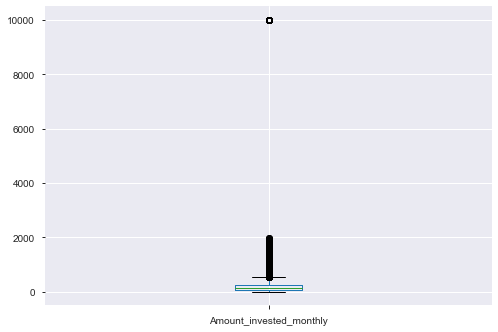

In [552]:
df2["Amount_invested_monthly"].plot(kind = "box")

In [554]:
df2.loc[df2["Amount_invested_monthly"]>=10000, 'Amount_invested_monthly'] = None

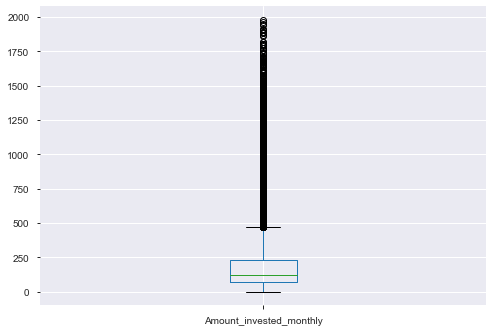

In [555]:
df2["Amount_invested_monthly"].plot(kind="box")

In [556]:
# value of the outlier is drop from the 10000 to 2000

In [557]:
df2["Amount_invested_monthly"].value_counts()

0.000000      381
32.589364       6
97.844890       6
99.750397       6
31.391655       5
             ... 
148.348225      1
285.535354      1
168.341463      1
115.588104      1
380.056813      1
Name: Amount_invested_monthly, Length: 136496, dtype: int64

In [564]:
df2['Amount_invested_monthly'] = df2.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [567]:
# For the Classification we use the "Credit_Score" for the testing
df2[df2["Credit_Score"].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [568]:
df2.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Num_Bank_Account'],
      dtype='object')

In [569]:
df2["Num_Bank_Account"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149995   NaN
149996   NaN
149997   NaN
149998   NaN
149999   NaN
Name: Num_Bank_Account, Length: 150000, dtype: float64

In [572]:
df2.drop(['Num_Bank_Account'], axis=1,inplace=True)

In [573]:
df2[df2["Credit_Score"].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [574]:
# Train save
df2[df2["Credit_Score"].notna()].to_csv("modify_train.csv",index = False)

In [575]:
# Test check
df2[df2["Credit_Score"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  

In [576]:
# test save
df2[df2["Credit_Score"].isna()].drop(columns = "Credit_Score").to_csv("Modify_test.csv",index= False)